In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
train_df = pd.read_csv('train_data_set.csv')
print(train_df.head)

<bound method NDFrame.head of       blue_win  blue_kills  blue_deaths  blue_assists  blue_kda  red_kills  \
0            0          22           42            31  1.261905         42   
1            0           9           17            13  1.294118         17   
2            1          50           29            86  4.689655         29   
3            0          16           24            21  1.541667         24   
4            1          24           18            49  4.055556         18   
...        ...         ...          ...           ...       ...        ...   
1699         1          19            7            25  6.285714          7   
1700         0          15           27            21  1.333333         27   
1701         1          42           37            58  2.702703         35   
1702         1          31           25            52  3.320000         25   
1703         0          18           26            22  1.538462         26   

      red_deaths  red_assists   r

In [3]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   blue_win         1704 non-null   int64  
 1   blue_kills       1704 non-null   int64  
 2   blue_deaths      1704 non-null   int64  
 3   blue_assists     1704 non-null   int64  
 4   blue_kda         1704 non-null   float64
 5   red_kills        1704 non-null   int64  
 6   red_deaths       1704 non-null   int64  
 7   red_assists      1704 non-null   int64  
 8   red_kda          1704 non-null   float64
 9   blue_Tank        1704 non-null   int64  
 10  red_Tank         1704 non-null   int64  
 11  blue_Mage        1704 non-null   int64  
 12  red_Mage         1704 non-null   int64  
 13  blue_Assassin    1704 non-null   int64  
 14  red_Assassin     1704 non-null   int64  
 15  blue_Marksman    1704 non-null   int64  
 16  red_Marksman     1704 non-null   int64  
 17  blue_Support  

In [4]:
print(train_df.describe())
# mean is around 0.437 that means there are almost equal no of 1 and 0's, so it's not imbalanced classes rather very balanced.
# just judging based on accuracy shd be fine, no need of F1 score anol for balanced classes.

          blue_win   blue_kills  blue_deaths  blue_assists     blue_kda  \
count  1704.000000  1704.000000  1704.000000   1704.000000  1704.000000   
mean      0.445423    25.283451    26.690728     38.167254     2.872923   
std       0.497158    11.411641    10.852830     20.479761     2.224742   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000    17.000000    19.000000     22.000000     1.333333   
50%       0.000000    25.000000    27.000000     37.000000     2.206897   
75%       1.000000    33.000000    34.250000     53.000000     3.943978   
max       1.000000    64.000000    67.000000    108.000000    24.500000   

         red_kills   red_deaths  red_assists      red_kda     blue_Tank  ...  \
count  1704.000000  1704.000000  1704.000000  1704.000000  1.704000e+03  ...   
mean     26.611502    25.365610    40.204812     3.364166  1.567235e+05  ...   
std      10.849659    11.430487    19.964642     2.819623  1.572263e+05  ...   
min 

In [5]:
pearson_corr = train_df.corr(method='pearson')['blue_win'].drop('blue_win')

# Calculate Spearman correlation
spearman_corr = train_df.corr(method='spearman')['blue_win'].drop('blue_win')

# Combine the results into a DataFrame for easy comparison
correlation_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})

# Sort by absolute values of Pearson correlation for better readability
correlation_df = correlation_df.reindex(correlation_df['Pearson'].abs().sort_values(ascending=False).index)

print(correlation_df)

                  Pearson  Spearman
blue_kda         0.698727  0.824013
red_kda         -0.582473 -0.830987
blue_kills       0.570067  0.588616
red_deaths       0.568470  0.587414
blue_assists     0.510978  0.518945
red_kills       -0.483904 -0.494223
blue_deaths     -0.482689 -0.492775
red_assists     -0.429352 -0.437700
blue_Marksman    0.203400  0.201424
blue_Fighter     0.182011  0.174450
blue_Mage        0.157574  0.141928
blue_Assassin    0.152756  0.135840
blue_Support     0.140639  0.116259
blue_Tank        0.135834  0.105457
red_Fighter     -0.118554 -0.129170
red_Tank        -0.118430 -0.103392
rank_score_red  -0.112215 -0.091254
red_Support     -0.098009 -0.093236
red_Mage        -0.097177 -0.098590
red_Marksman    -0.088402 -0.097229
red_Assassin    -0.071128 -0.068071
rank_score_blue  0.051062  0.076147


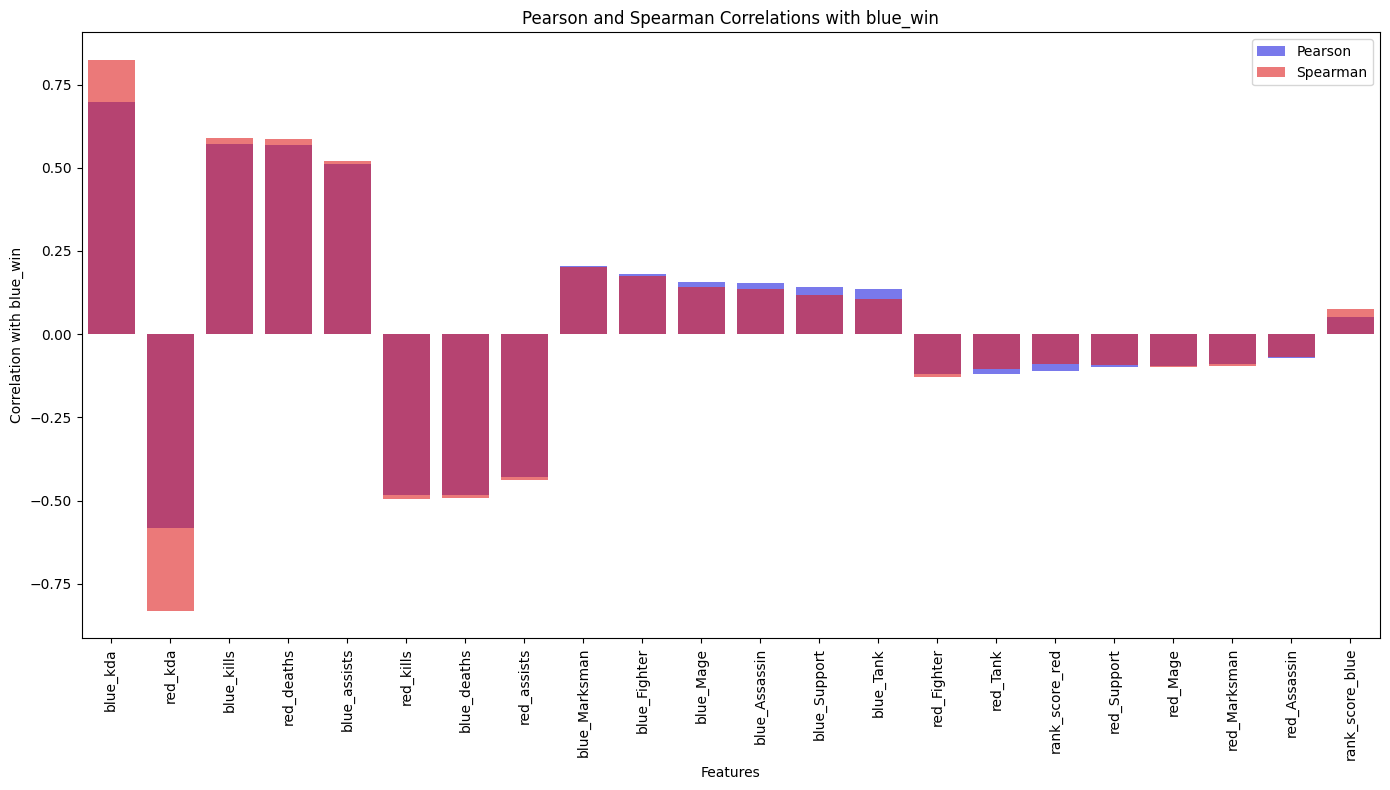

In [6]:
plt.figure(figsize=(14, 8))

# Plot Pearson correlations
sns.barplot(x=correlation_df.index, y=correlation_df['Pearson'], color='blue', alpha=0.6, label='Pearson')

# Plot Spearman correlations
sns.barplot(x=correlation_df.index, y=correlation_df['Spearman'], color='red', alpha=0.6, label='Spearman')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Correlation with blue_win')
plt.title('Pearson and Spearman Correlations with blue_win')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
X = train_df.drop(columns=['blue_win'])
y = train_df['blue_win']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print(X_scaled)

[[-0.28781266  1.41103901 -0.35007036 ...  1.45875839  0.90614577
   1.00934767]
 [-1.42733473 -0.89318385 -1.22924486 ... -0.71528918  0.36228276
   0.48854685]
 [ 2.16654257  0.21284312  2.33629616 ... -0.17535361  0.36228276
   1.00934767]
 ...
 [ 1.46529822  0.95019443  0.96869139 ... -0.03919387 -0.58947749
   1.09614781]
 [ 0.50108724 -0.15583254  0.67563322 ...  0.18419855  0.54357043
  -0.7483551 ]
 [-0.63843483 -0.06366362 -0.78965761 ... -1.32402498  0.77018002
   0.22814644]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier()
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model_scores = {}
for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1')
    model_scores[model_name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
    }

# Create a DataFrame to display the results
model_scores_df = pd.DataFrame(model_scores).T
model_scores_df = model_scores_df[['accuracy_mean', 'accuracy_std']]

# Sort by F1-score for better readability
model_scores_df = model_scores_df.sort_values(by='accuracy_mean', ascending=False)

print(model_scores_df)

C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

                     accuracy_mean  accuracy_std
Random Forest             0.949515      0.012710
Logistic Regression       0.948338      0.016821
Gradient Boosting         0.945986      0.018602
Decision Tree             0.920774      0.016248
SVM                       0.770516      0.034097
k-NN                      0.729460      0.036912


In [11]:
best_model_name = model_scores_df.index[0]
best_model_accuracy = model_scores_df['accuracy_mean'][0]
print(best_model_name, best_model_accuracy)

Random Forest 0.9495149638802889


C:\Users\Ajay Kanna\AppData\Local\Temp\ipykernel_90296\253401594.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_model_accuracy = model_scores_df['accuracy_mean'][0]


In [12]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVM': {
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': [3, 5]
        }
    },
    'k-NN': {
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}

best_model = models[best_model_name]['model']
param_grid = models[best_model_name]['param_grid']

# Initialize GridSearchCV with the best model and its parameter grid
grid_search = GridSearchCV(best_model, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to obtain the best parameters
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters
print("Best Parameters for", best_model_name, ":", best_params)
print("Best Accuracy:", best_score)

Best Parameters for Random Forest : {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9518679050567596


In [13]:
best_model_info = {
    'model_name': best_model_name,
    'best_params': best_params,
    'best_accuracy': best_score
}

# Store best_model_info in a binary file using pickle
with open('best_model_info.pkl', 'wb') as f:
    pickle.dump(best_model_info, f)


In [14]:
import pickle

# Load best_model_info from the binary file
with open('best_model_info.pkl', 'rb') as f:
    best_model_info = pickle.load(f)

# Now best_model_info contains your stored information
print(best_model_info)

{'model_name': 'Random Forest', 'best_params': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, 'best_accuracy': 0.9518679050567596}


In [15]:
# Load test data
test_df = pd.read_csv('chumma.csv')

# Ensure the test DataFrame has the same structure as the training DataFrame
X_test = test_df.drop(columns=['blue_win'])
y_test = test_df['blue_win']

# Assuming X_train was scaled with StandardScaler during training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # This is for reference, during training

# Scale the test data
X_test_scaled = scaler.transform(X_test)

FileNotFoundError: [Errno 2] No such file or directory: 'chumma.csv'

In [ ]:
best_model_name = best_model_info['model_name']
best_params = best_model_info['best_params']

# Initialize the model with the best parameters
if best_model_name == 'Logistic Regression':
    best_model = LogisticRegression(**best_params)
elif best_model_name == 'Random Forest':
    best_model = RandomForestClassifier(**best_params)
elif best_model_name == 'SVM':
    best_model = SVC(**best_params)
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingClassifier(**best_params)
elif best_model_name == 'Decision Tree':
    best_model = DecisionTreeClassifier(**best_params)
elif best_model_name == 'k-NN':
    best_model = KNeighborsClassifier(**best_params)
else:
    raise ValueError(f"Unsupported model: {best_model_name}")

# Fit the model on the entire training set (as the best parameters were found using cross-validation)
best_model.fit(X, y)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [ ]:
# Predict the test set results
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9402173913043478


C:\Users\Ajay Kanna\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
